# Predicting Heart Disease 

**Project Objective:** In this project I want to practice my data science / machine learning skills on a classification problem using varioud tools such as Pandas, NumPy, Matplotlib, and Scikit-Learn. 

**Project Goal:** This will be a successful project if I am able to go through and clearly explain the steps of a typical machine learning pipeline that will be applied to the dataset. 

I a going to follow this machine learning pipeline:

Preparation:

1. Problem definition
2. Data Overview
3. Evaluation Grading
4. Features List

Data Manipulation & Modelling

1. Preparing the Tools
2. Data Exploration
3. Modelling
4. Hyperparameter tuning
5. Evalualting
6. Feature Importance

Summary

# Preparation

## 1. Problem Definition:

> Given certain clinical parameters, can we predict whether or not the patient has heart disease?

## 2. Data Overview:

The original data came from the Cleavland data from the UCI Machine Learning Repository:
https://archive.ics.uci.edu/ml/datasets/heart+Disease
    
**I have modified the dataset to have some missing values, for two reasons...**
1. I want to work with a more realistic dataset, even though this is a medical one, typically real-world datasets have some form of a missing value.
2. With a fully complete dataset I would not be able to showcase/practice my dataset maniuplation skills.

## 3. Evaluation Grading

> If the model has an accuracy score of **greatar then 85%** I will consider this is a successful project. Typically for medical-related datasets the accuracy should be much higher , but since my project is focused on the process more then the results I will accept a >85% score. It will also be interesting to see how much artifically removing data affects the score.

## 4. Features List

For this dataset Kaggle provides a data dictonary explaining what each of the columns in the dataset does. In a typically scenario I would have to do research myself to gather this information, but since it's already provided I will use this.

**Data Dictionary**

1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    * '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
        * can range from mild symptoms to severe problems
        * signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
        * Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
13. thal - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

**Everything above is just preparation to actually begin the data science and machine learning portion of the project**


# Data Manipulation & Modelling

## 1. Preparing the Tools

I am going to import Pandas, NumPy, Matplotlib, and Seaborn for data manipulation.

I am going to import Scikit-Learn and a few select models for evaluating and modelling.

In [70]:
# For Data Manipulation and Exploration
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# For Model Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

# Choosen Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

## 2. Data Exploration

Here I will be loading the data into a Pandas DataFrame, exploring it's content to build understanding, dealing with missing values, and getting it ready for modelling.

In [71]:
# Load dataset into a dataframe
df = pd.read_csv("data/heart-disease.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,1.0
1,37.0,1.0,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2,1.0
2,41.0,0.0,1,NaN,204.0,0,0,172.0,0,1.4,2,0,2,1.0
3,56.0,1.0,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2,1.0
4,57.0,NaN,0,120.0,354.0,0,1,163.0,1,0.6,2,0,2,1.0


In [72]:
# Table is 303 rows x 14 columns
df.shape

(303, 14)

In [73]:
# We have a total of 303 patient examples... 
# 160 of which have heart diease and 135 don't have heart disease.
df["target"].value_counts()

1.0    163
0.0    135
Name: target, dtype: int64

In [74]:
# from the cell above, if you look closer 160 + 135 ≠ 303
# This is an indication of missing values.
# Check for missing values
df.isna().sum()

age         2
sex         2
cp          0
trestbps    2
chol        2
fbs         0
restecg     0
thalach     3
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      5
dtype: int64

In [75]:
# I am also going to check for datatypes right away so we know what we are working with.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       301 non-null    float64
 1   sex       301 non-null    float64
 2   cp        303 non-null    int64  
 3   trestbps  301 non-null    float64
 4   chol      301 non-null    float64
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   300 non-null    float64
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    298 non-null    float64
dtypes: float64(7), int64(7)
memory usage: 33.3 KB


We are fully working with numbers which is good because it allows us to deal with missing values in a easier way
First we will remove all rows that have a **missing target column**, since that is the target (what we are training our model to predict).

In [76]:
# Drop rows with missing target columns and check missing values
df = df.dropna(axis=0, subset=['target'])
df.isna().sum()

age         1
sex         2
cp          0
trestbps    2
chol        2
fbs         0
restecg     0
thalach     2
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [77]:
# The columns without a target value have been successfully removed. We can double check by looking at the shape
# Now we should only have 295 rows
df.shape

(298, 14)

**We will now deal with the other columns with missing values**
- For `age` we can calculate the mean age and assign it to the missing values.
- For the `sex` column we can most likely drop that row since it's tough to predict or get a meaningful average out of those numbers.
- For `trestbps` we can calculate the mean trestbps and assign it to the missing values.
- For `chol` we can calculate the mean chol and assign it to the missing values.
- For `thalach` we can calculate the mean thalach and assign it to the missing values.

**Keep in mind the more rows we remove he worse our model will perform due to lack of data, I am referring back to the data dictionary to decide if we should remove or use the mean**

In [78]:
# Remove columns with missing sex or cp
df = df.dropna(axis=0, subset=['sex'])
df.isna().sum()

age         1
sex         0
cp          0
trestbps    2
chol        2
fbs         0
restecg     0
thalach     2
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [79]:
# Find mean for the remaining columns with missing values
round(df["age"].mean()), round(df["trestbps"].mean()), round(df["chol"].mean()), round(df["thalach"].mean())

(54, 131, 247, 150)

In [80]:
# Filling missing values with the columns mean
df["age"].fillna(round(df["age"].mean()), inplace = True) 
df["trestbps"].fillna(round(df["trestbps"].mean()), inplace = True) 
df["chol"].fillna(round(df["chol"].mean()), inplace = True) 
df["thalach"].fillna(round(df["thalach"].mean()), inplace = True) 
# Now we have no missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [81]:
# Our data is already in the form of numbers
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 296 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       296 non-null    float64
 1   sex       296 non-null    float64
 2   cp        296 non-null    int64  
 3   trestbps  296 non-null    float64
 4   chol      296 non-null    float64
 5   fbs       296 non-null    int64  
 6   restecg   296 non-null    int64  
 7   thalach   296 non-null    float64
 8   exang     296 non-null    int64  
 9   oldpeak   296 non-null    float64
 10  slope     296 non-null    int64  
 11  ca        296 non-null    int64  
 12  thal      296 non-null    int64  
 13  target    296 non-null    float64
dtypes: float64(7), int64(7)
memory usage: 34.7 KB


In [82]:
# One finally thing we want to see is some basic statistics about our dataset to imporve understanding
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000
mean,54.297297,0.685811,0.976351,131.493243,246.668919,0.148649,0.527027,149.729730,0.327703,1.032432,1.402027,0.729730,2.327703,0.543919
std,9.128803,0.464978,1.033071,17.612783,51.349700,0.356344,0.526529,22.743848,0.470171,1.152166,0.613848,1.025734,0.608451,0.498911
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,211.750000,0.000000,0.000000,133.750000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.250000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


**Now that our dataset is ready we will do some comparisons within the columns to see if we can find anything interesting**

In [83]:
# How many of each sex do we have data for...
# We have 203 males and 93 females
df.sex.value_counts()

1.0    203
0.0     93
Name: sex, dtype: int64

In [84]:
pd.crosstab(df.target, df.sex)

sex,0.0,1.0
target,,
0.0,23,112
1.0,70,91


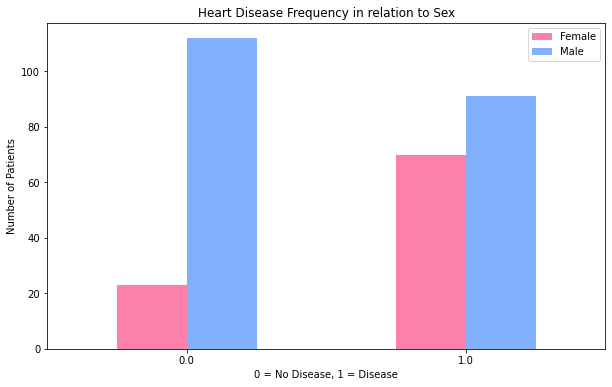

In [85]:
# We can model this comparison onto a graph for an easier analysis of the data
pd.crosstab(df.target, df.sex).plot(kind="bar",
                                     figsize=(10,6),
                                     color=["#fc81a8", "#81b0fc"])

plt.title("Heart Disease Frequency in relation to Sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Number of Patients")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0);
# Here we can see the proportions of male and females who both have heart disease and do not have heart disease

In [86]:
# Another interesting comparison would be the relationship between age and heart disease frequency
df.age.value_counts()

58.0    19
54.0    17
57.0    15
59.0    13
52.0    13
51.0    12
56.0    11
44.0    11
60.0    11
41.0    10
62.0    10
67.0     9
63.0     9
64.0     9
43.0     8
42.0     8
65.0     8
53.0     8
45.0     8
55.0     8
66.0     7
61.0     7
46.0     7
50.0     7
48.0     6
49.0     5
35.0     4
70.0     4
68.0     4
47.0     4
39.0     4
69.0     3
71.0     3
40.0     3
38.0     3
34.0     2
37.0     2
29.0     1
74.0     1
76.0     1
77.0     1
Name: age, dtype: int64

In [87]:
pd.crosstab(df.target, df.age)

age,29.0,34.0,35.0,37.0,38.0,39.0,40.0,41.0,42.0,43.0,...,65.0,66.0,67.0,68.0,69.0,70.0,71.0,74.0,76.0,77.0
target,,,,,,,,,,,,,,,,,,,,,
0.0,0,0,2,0,1,1,2,1,1,3,...,4,3,6,2,1,3,0,0,0,1
1.0,1,2,2,2,2,3,1,9,7,5,...,4,4,3,2,2,1,3,1,1,0


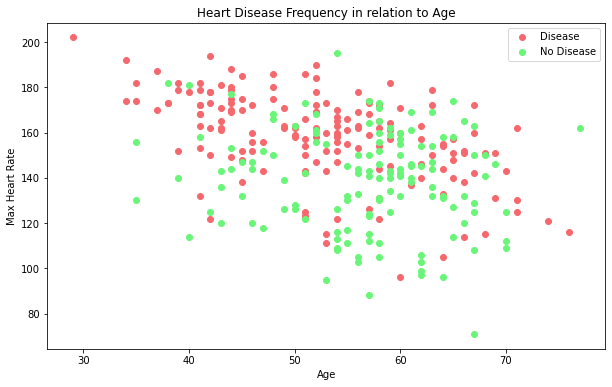

In [88]:
# We can model this comparison onto a graph for an easier analysis of the data
# Here we are creating a scatter plot with the relationship between age // thalach (max heart rate) and heart disease
plt.figure(figsize=(10, 6))

# Scatter with yes heart disease examples
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            color="#f5696e")

# Scatter with no heart disease examples
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            color="#69f577")

plt.title("Heart Disease Frequency in relation to Age")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);
# This graph (although it looks nice) doesn't provide a very clear picture of any te=rends.
# It mainly assists in finding some outliers, but for non-medical people like myself this doesn't tell me much.

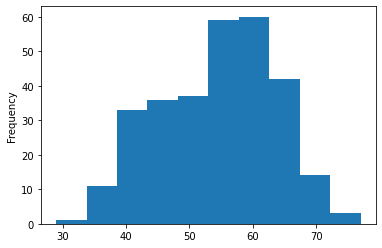

In [89]:
# Another graph that would be much better to relate Age to Heart Disease would be a histogram
df.age.plot.hist();
# Here wecan see a bell-curve like shape peaking around the age of 60.

**We can continue exploring different attributes to gain a better sense of the data, I am going to just make one last large comparison prior to moving onto modelling**

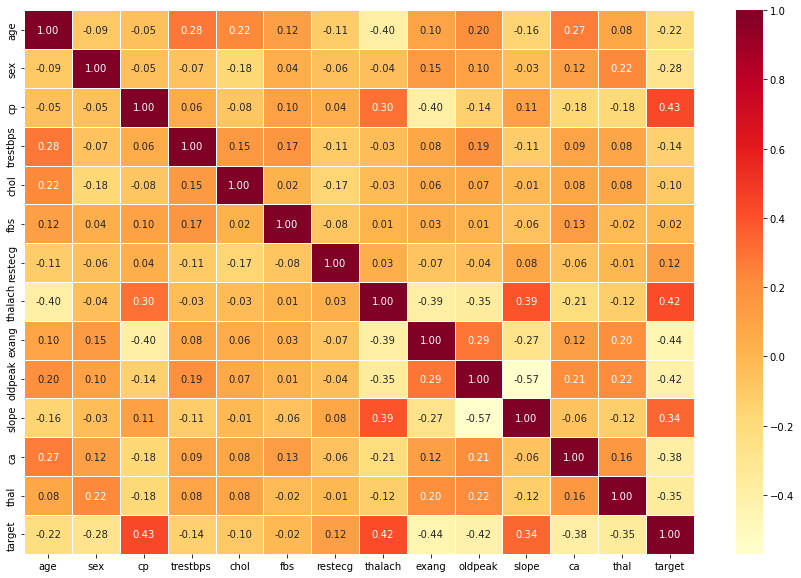

In [90]:
# We are going to create a correlation matrix (look below for explanation) 
# to see how each of the parameters relate to each other.
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlOrRd");

#### Correlation Matrix Basic Explanation:
https://www.youtube.com/watch?v=qUmmATEJdgM

- A table showing the correlation coeffecients of parameters
- Number range from +1.00 to -1.00
    * +1.00 means a perfect positive correlation
    * 0.00 means no relationship
    * -1.00 means a perfect negative correlation
- Correlations measure the direction and strength of a linear relationship among parameters
    * A positive correlation indicates that as one parameter increases so does the other one
    * A negative correlation indicates that as one parameter increases the other parameter decreases and visa versa

## 3. Modelling

After setting up and exploring the data we can now begin creating the model.

In [91]:
# Set vraibles X & y

# X is the set where we are going to predict the target 
X = df.drop("target", axis=1)
# y will be the answers to the models predictions
y = df["target"]

In [92]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1
1,37.0,1.0,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2
2,41.0,0.0,1,131.0,204.0,0,0,172.0,0,1.4,2,0,2
3,56.0,1.0,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2
6,56.0,0.0,1,140.0,294.0,0,0,153.0,0,1.3,1,0,2


In [93]:
y.head()

0    1.0
1    1.0
2    1.0
3    1.0
6    1.0
Name: target, dtype: float64

In [94]:
# Now we are going to split our data into training and testing sets.

# Set a random number to a reproducable value
np.random.seed(0)

# Split into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# 20% of the data will be split of to test on, 80% will be used to train

We have split our data into train and test splits. 

Now we will create a function to test out different models and see which one works best.

In [95]:
# Put models in a dictionary
models = {"Logistic Regression": LogisticRegression(max_iter=1000000),
          "Gradient Boosting Classifier": GradientBoostingClassifier(),
          "SGD": SGDClassifier(),
          "SVM": svm.SVC(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    '''
    Fits and evaluates given machine learning models.
    models: a dict of different differnt Sckikit-Learn machine learning models
    X_train: training data (no labels)
    X_test: testing data (no lables)
    y_train: training labels
    y_test: test labels
    '''
    # Set random seed
    np.random.seed(0)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [96]:
# Use our function to score all of our different models
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

{'Logistic Regression': 0.85,
 'Gradient Boosting Classifier': 0.8333333333333334,
 'SGD': 0.5166666666666667,
 'SVM': 0.65,
 'KNN': 0.6833333333333333,
 'Random Forest': 0.85}

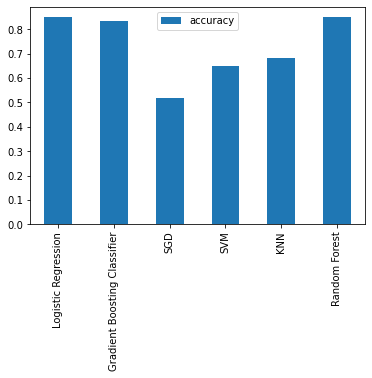

In [97]:
# Although it's pretty obvious at the moment, it would be helpful to create a quick graph comparing the models
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

## 4. Hyperparameter Tuning

Since a few of our models are quite close we will do some hyperparameter tuning to two of the models in order to see if I can imporve results.

I will tune the Logistic Regression and Random Forest models using RandomizedSearchCV to make the process much easier.

**Reading documentation what each of these models actually do**

#### **Logistic Regression Tuning**

In [98]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["newton-cg", "liblinear"]}
# Obviously many more parameters can be adjusted and iterated during the next cell, however
# to keep things effecient I have limited them.

In [99]:
# Setup Random Seed
np.random.seed(0)

# Setup random hyperprarmeter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperpraremeter search model for LogisticRegression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['newton-cg', 'liblinear']},
                   verbose=True)

In [100]:
# Get best parameter combination for LogisticRegression
rs_log_reg.best_params_

{'solver': 'newton-cg', 'C': 0.23357214690901212}

In [101]:
# Get accuracy score of LogisticRegression
rs_log_reg.score(X_test, y_test)

0.8666666666666667

#### **Random Forest Tuning**

In [102]:
# Create a hyperparameter grid for RandomForestClassifier
rand_for_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

In [103]:
# Setup random seed
np.random.seed(0)

# Setup random Hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rand_for_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit random hyperprarmeter search model for RandomForestClassifier()
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [104]:
rs_rf.best_params_

{'n_estimators': 360,
 'min_samples_split': 8,
 'min_samples_leaf': 5,
 'max_depth': 10}

In [105]:
rs_rf.score(X_test, y_test)

0.85

**These scores are definetly a bit low, but keeping in mind the data was artifically altered it makes sense, further hyperparameter tunign can definetly help with increasing accuracy, but for now we will take 85%**

## 5. Evaluating

Now I will display some other evaluation metrics (besides accuracy which is the default)

We will have a look at...
* ROC curve and AUC score
* Classification report
* Precision
* Recall
* F1-score

and some of these we will calculate using `cross-val_score()`

In [106]:
# Make predictions with tuned model
y_preds = rs_log_reg.predict(X_test)

In [107]:
y_preds

array([0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0.,
       1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0.,
       0., 1., 0., 1., 0., 0., 1., 0., 1.])

In [108]:
y_test

235    0.0
233    0.0
15     1.0
220    0.0
269    0.0
48     1.0
243    0.0
58     1.0
218    0.0
66     1.0
302    0.0
18     1.0
149    1.0
228    0.0
25     1.0
240    0.0
224    0.0
273    0.0
69     1.0
114    1.0
55     1.0
265    0.0
67     1.0
215    0.0
284    0.0
203    0.0
84     1.0
250    0.0
286    0.0
219    0.0
10     1.0
211    0.0
119    1.0
163    1.0
121    1.0
194    0.0
7      1.0
100    1.0
104    1.0
95     1.0
259    0.0
109    1.0
195    0.0
62     1.0
9      1.0
212    0.0
77     1.0
238    0.0
106    1.0
76     1.0
176    0.0
298    0.0
29     1.0
241    0.0
93     1.0
221    0.0
274    0.0
164    1.0
295    0.0
287    0.0
Name: target, dtype: float64

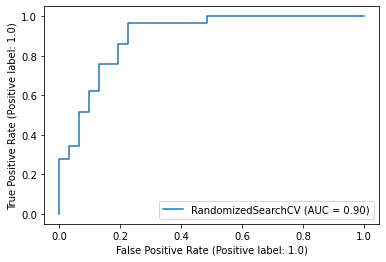

In [109]:
# Plot ROC curve and calculate and calcuate the AUC metric (check below for explanation)

# Ignore Future Deprication Warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Plot ROC Curve
plot_roc_curve(rs_log_reg, X_test, y_test);

#### ROC Curve Explanation

An ROC curve (receiver operating characteristic curve) is a graph shows the performance of a classification model. This curve plots True Positive Rate vs False Positive Rate. For more: https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc

#### AUC Explanation

AUC stands for area under the curve so it is simply a measure of the area under the curve with 1.00 being max.

In [110]:
# A classification Report shows the rest of the evaluation metrics.
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

         0.0       0.96      0.77      0.86        31
         1.0       0.80      0.97      0.88        29

    accuracy                           0.87        60
   macro avg       0.88      0.87      0.87        60
weighted avg       0.88      0.87      0.87        60



### Calculate evaluation metrics using cross-validation

I will calculate `accuracy`, `precision`, `recall`, and `f1-score` of our model using `cross_val_score()`

We will first remind ourselves of the best_params for the Logistic Regression model.

In [111]:
# Best Parameters
rs_log_reg.best_params_

{'solver': 'newton-cg', 'C': 0.23357214690901212}

In [112]:
# Create a new classifier with best parameters 
clf = LogisticRegression(C=0.23357214690901212,
                         solver="newton-cg")

**We will use this defined classifier with `cross_val_score()` to calcultae the differnet metrics.**

In [113]:
# Cross-validated accuracy
cv_acc = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="accuracy")
cv_acc = np.mean(cv_acc)
cv_acc

0.8378531073446327

In [114]:
# Cross-validated precision
cv_precision = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="precision")
cv_precision = np.mean(cv_precision)
cv_precision

0.8197935397935397

In [115]:
# Cross-validated recall
cv_recall = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

0.9066287878787879

In [116]:
# Cross-validated f1-score
cv_f1 = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.8600261063767475

**We have now gathered each of these different metrics, which we can now graph to compare more easily**

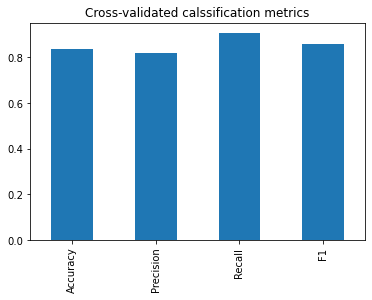

In [117]:
# Visualize cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                           "Precision": cv_precision,
                           "Recall": cv_recall,
                           "F1": cv_f1},
                          index=[0])
cv_metrics.T.plot.bar(title="Cross-validated calssification metrics",
                      legend=False);
# From this we see Recall us our highest score

## 6. Feature Importance

We have now completed the entire model and will have a quick look at feature importnace.

Feature importance is basically which parameters affected the outcome of the model the most.

In [118]:
# Fit an instance of LogisticRegression once again using the found best params
clf = LogisticRegression(C=0.23357214690901212,
                         solver="newton-cg")
clf.fit(X_train, y_train);

In [119]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,1.0
1,37.0,1.0,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2,1.0
2,41.0,0.0,1,131.0,204.0,0,0,172.0,0,1.4,2,0,2,1.0
3,56.0,1.0,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2,1.0
6,56.0,0.0,1,140.0,294.0,0,0,153.0,0,1.3,1,0,2,1.0


In [120]:
# Check coef_ array
clf.coef_

array([[ 0.01546096, -0.97670877,  0.75498436, -0.01775853, -0.00354206,
        -0.09553394,  0.2700072 ,  0.02994258, -0.50401584, -0.41157966,
         0.29026073, -0.64829223, -0.55712129]])

The coef_ contain the coefficients for the prediction of each of the targets. 
It is also the same as if you trained a model to predict each of the targets separately.

In [121]:
# Match coef's of features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.015460955473894982,
 'sex': -0.9767087668323776,
 'cp': 0.7549843633204715,
 'trestbps': -0.017758528641054153,
 'chol': -0.003542062686876112,
 'fbs': -0.09553393950945198,
 'restecg': 0.27000720099466924,
 'thalach': 0.029942578879656335,
 'exang': -0.5040158440812087,
 'oldpeak': -0.4115796551782402,
 'slope': 0.2902607296872448,
 'ca': -0.648292231055928,
 'thal': -0.5571212903082079}

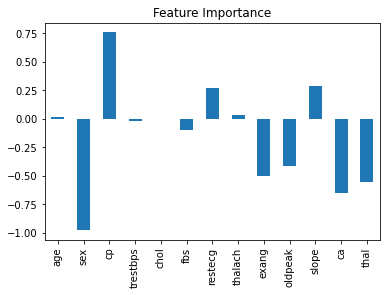

In [122]:
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False);

Feature importance gives us a lot of insight into which parameters are useful, harmful, or useless to the model. In order to improve the model the harmful parameters can be removed from the dataset.

**Positive feature importance:** A parameter that makes the loss go down. This means that the model is working with the parameter well.

**Negative feature importance:** A parameter that makes the loss go up. This means that the model is not working with the parameter well.

# Summary

In summary, we used a `LogisticRegression()` model to predict a heart disease classification problem. We reached a peak accuracy score of `86.67%`.  

In order to imporve the model we can... use full dataset, hypertune further, remove harmful parameters.